In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import pandas as pd
import numpy as np
import torch
import json

# **Load and visualize the data**

In [0]:
# Pol
# Read Balanced train data set
pol_train_balanced = pd.read_csv("/content/gdrive/My Drive/HCLHackathon/Pol/pol_train-unbalanced.csv", delimiter='|')
pol_test_balanced = pd.read_csv("/content/gdrive/My Drive/HCLHackathon/Pol/pol_test-unbalanced.csv", delimiter='|')

In [4]:
pol_train_balanced.head()

7vq9q                                    c07jfvv c07jy05              1 0
0  7xdys                            c07o37s c07o350 c07nywe            1 0 0
1  7z7hw                                            c07t4m0                0
2  80wd4  c07y92o c07y3b5 c07xybr c07xy8i c07y58d c07ydh...  0 0 0 0 0 0 0 0
3  bln1z                    c0ndefe c0ndajx c0nea64 c0ndbwa          1 0 0 0
4  bm9yo                                    c0nh0jw c0nhdes              1 0

In [5]:
pol_test_balanced.head()

80vzb  ...                                                  1
0  hqa1x  ...                                    0 0 0 0 0 0 0 1
1  i0v01  ...  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2  i2egd  ...                                                  0
3  i2a4h  ...                                      0 0 0 0 0 0 0
4  i6i1y  ...  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...

[5 rows x 3 columns]

In [6]:
#Check the column names
pol_train_balanced.columns

Index(['7vq9q', 'c07jfvv c07jy05', '1 0'], dtype='object')

In [7]:
pol_test_balanced.columns

Index(['80vzb', 'c07xxny', '1'], dtype='object')

In [0]:
# Rename column names
pol_train_balanced.columns = ["Comment_ID", "Response_ID", "Sent"]

In [0]:
pol_test_balanced.columns = ["Comment_ID", "Response_ID", "Sent"]

In [10]:
# Check column names
pol_train_balanced.columns

Index(['Comment_ID', 'Response_ID', 'Sent'], dtype='object')

In [11]:
pol_test_balanced.columns

Index(['Comment_ID', 'Response_ID', 'Sent'], dtype='object')

In [0]:
# Response_ID split
pol_train_balanced['Response_ID_1'], pol_train_balanced['Response_ID_2'] = pol_train_balanced['Response_ID'].str.split(' ', 1).str
pol_train_balanced['Response_ID_3'], pol_train_balanced['Response_ID_4'] = pol_train_balanced['Response_ID_2'].str.split(' ', 1).str

In [20]:
pol_train_balanced.head()

Comment_ID  ...                                    Response_ID_4
0      7xdys  ...                                          c07nywe
1      7z7hw  ...                                              NaN
2      80wd4  ...  c07xybr c07xy8i c07y58d c07ydhp c07xy91 c07y2v1
3      bln1z  ...                                  c0nea64 c0ndbwa
4      bm9yo  ...                                              NaN

[5 rows x 9 columns]

In [21]:
pol_test_balanced['Response_ID_1'], pol_test_balanced['Response_ID_2'] = pol_test_balanced['Response_ID'].str.split(' ', 1).str
pol_test_balanced['Response_ID_3'], pol_test_balanced['Response_ID_4'] = pol_test_balanced['Response_ID_2'].str.split(' ', 1).str
pol_test_balanced.head()

Comment_ID  ...                                      Response_ID_4
0      hqa1x  ...    c1xjklv c1xhlkp c1xirrh c1xjvga c1xiwky c1xiujs
1      i0v01  ...  c1zznb9 c2005ij c201p2x c2013gb c1zzs9v c1zzcf...
2      i2egd  ...                                                NaN
3      i2a4h  ...            c20b2ve c20b1l4 c20as78 c20dgpg c20al4l
4      i6i1y  ...  c21b4vu c21f2yg c21fx18 c21bv5e c21dlfg c21dy7...

[5 rows x 7 columns]

In [0]:
# Sent column split
pol_train_balanced['Sent_1'], pol_train_balanced['Sent_2'] = pol_train_balanced['Sent'].str.split(' ', 1).str
pol_train_balanced['Sent_3'], pol_train_balanced['Sent_4'] = pol_train_balanced['Sent_2'].str.split(' ', 1).str

In [23]:
pol_train_balanced.head()

Comment_ID  ...       Sent_4
0      7xdys  ...            0
1      7z7hw  ...          NaN
2      80wd4  ...  0 0 0 0 0 0
3      bln1z  ...          0 0
4      bm9yo  ...          NaN

[5 rows x 11 columns]

In [24]:
pol_test_balanced['Sent_1'], pol_test_balanced['Sent_2'] = pol_test_balanced['Sent'].str.split(' ', 1).str
pol_test_balanced['Sent_3'], pol_test_balanced['Sent_4'] = pol_test_balanced['Sent_2'].str.split(' ', 1).str
pol_test_balanced.head()

Comment_ID  ...                                             Sent_4
0      hqa1x  ...                                        0 0 0 0 0 1
1      i0v01  ...  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...
2      i2egd  ...                                                NaN
3      i2a4h  ...                                          0 0 0 0 0
4      i6i1y  ...  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ...

[5 rows x 11 columns]

In [25]:
# Splitting the data to combine
df1 = pol_train_balanced[['Response_ID_1','Sent_1']]
df1.columns = ['Response_ID','Sent']
df1.head()

Response_ID Sent
0     c07o37s    1
1     c07t4m0    0
2     c07y92o    0
3     c0ndefe    1
4     c0nh0jw    1

In [26]:
df2 = pol_train_balanced[['Response_ID_3','Sent_3']]
df2.columns = ['Response_ID','Sent']
df2.head()

Response_ID Sent
0     c07o350    0
1         NaN  NaN
2     c07y3b5    0
3     c0ndajx    0
4     c0nhdes    0

In [27]:
# Appending both the data frames
frames = [df1, df2]
df_pol_train_balanced = pd.concat(frames)
df_pol_train_balanced.head()

Response_ID Sent
0     c07o37s    1
1     c07t4m0    0
2     c07y92o    0
3     c0ndefe    1
4     c0nh0jw    1

In [28]:
# Checking both the data frames has same text
df2.tail()

Response_ID Sent
13654         NaN  NaN
13655         NaN  NaN
13656         NaN  NaN
13657     dfoadrb    0
13658     dfo8g7h    0

In [29]:
df_pol_train_balanced.tail()

Response_ID Sent
13654         NaN  NaN
13655         NaN  NaN
13656         NaN  NaN
13657     dfoadrb    0
13658     dfo8g7h    0

In [30]:
# Checking shapes - Verifying data is cpoied properly
df1.shape

(13659, 2)

In [31]:
df2.shape

(13659, 2)

In [32]:
df_pol_train_balanced.shape

(27318, 2)

In [33]:
# Check the size
13659 * 2

27318

In [34]:
df11 = pol_test_balanced[['Response_ID_1','Sent_1']]
df11.columns = ['Response_ID','Sent']

df21 = pol_test_balanced[['Response_ID_3','Sent_3']]
df21.columns = ['Response_ID','Sent']

frames1 = [df11, df21]
df_pol_test_balanced = pd.concat(frames1)
df_pol_test_balanced.head()

Response_ID Sent
0     c1xj4e2    0
1     c201mb5    0
2     c20c1j4    0
3     c20an8u    0
4     c21bxjw    0

In [35]:
df11.shape

(3428, 2)

In [36]:
df21.shape

(3428, 2)

In [37]:
df_pol_test_balanced.shape

(6856, 2)

In [38]:
df_pol_train_balanced.dropna()

Response_ID Sent
0         c07o37s    1
1         c07t4m0    0
2         c07y92o    0
3         c0ndefe    1
4         c0nh0jw    1
...           ...  ...
13651     dfojtlo    0
13652     dfo8shw    0
13653     dfok16x    1
13657     dfoadrb    0
13658     dfo8g7h    0

[24552 rows x 2 columns]

In [39]:
df_pol_test_balanced.dropna()

Response_ID Sent
0        c1xj4e2    0
1        c201mb5    0
2        c20c1j4    0
3        c20an8u    0
4        c21bxjw    0
...          ...  ...
3421     dfmbqat    0
3422     dfmy4a5    1
3423     dfmprjl    0
3426     dfnxk8g    0
3427     dfp42jx    0

[6184 rows x 2 columns]

In [0]:
# Read JSON File 
import json
with open("/content/gdrive/My Drive/HCLHackathon/Pol/pol_comments.json") as datafile:
    data = json.load(datafile)
jsondf = pd.DataFrame(data)

In [41]:
jsondf.head()

7uxqr  ...            dfo8us6
text    Nancyt Pelosi messes up.. 500 Million Jobs los...  ...  Ohh thats bad....
author                                            Fishbum  ...        Quinnjester
score                                                   0  ...                  1
ups                                                     2  ...                 -1
downs                                                   4  ...                 -1

[5 rows x 579790 columns]

In [0]:
pol_jdf = jsondf.transpose()

In [43]:
pol_jdf.columns

Index(['text', 'author', 'score', 'ups', 'downs', 'date', 'created_utc',
       'subreddit'],
      dtype='object')

In [44]:
pol_jdf.head()

text  ... subreddit
7uxqr    Nancyt Pelosi messes up.. 500 Million Jobs los...  ...  politics
7vewt                 Netflix CEO: "Please raise my taxes"  ...  politics
7vq9q          The Six Million Dead Jews of World War ONE!  ...  politics
c07jfvv  Oh right, *both* wars were just jewish conspir...  ...  politics
7w0as    GOP says it is necessary to spend my tax dolla...  ...  politics

[5 rows x 8 columns]

In [0]:
pol_jdf.index.name = "Response_ID"

In [46]:
pol_jdf.head()

text  ... subreddit
Response_ID                                                     ...          
7uxqr        Nancyt Pelosi messes up.. 500 Million Jobs los...  ...  politics
7vewt                     Netflix CEO: "Please raise my taxes"  ...  politics
7vq9q              The Six Million Dead Jews of World War ONE!  ...  politics
c07jfvv      Oh right, *both* wars were just jewish conspir...  ...  politics
7w0as        GOP says it is necessary to spend my tax dolla...  ...  politics

[5 rows x 8 columns]

In [0]:
# Combine the data
pol_comb = pd.merge(df_pol_train_balanced, pol_jdf, left_on="Response_ID", right_on="Response_ID")

In [48]:
pol_comb.head()

Response_ID Sent  ... created_utc subreddit
0     c07o37s    1  ...  1234642047  politics
1     c07t4m0    0  ...  1235247762  politics
2     c07y92o    0  ...  1235837372  politics
3     c0ndefe    1  ...  1270224074  politics
4     c0nh0jw    1  ...  1270404022  politics

[5 rows x 10 columns]

In [49]:
# Combine test data
polb_test_comb = pd.merge(df_pol_test_balanced, pol_jdf, left_on="Response_ID", right_on="Response_ID")
polb_test_comb.head()

Response_ID Sent  ... created_utc subreddit
0     c1xj4e2    0  ...  1307080843  politics
1     c201mb5    0  ...  1308234522  politics
2     c20c1j4    0  ...  1308343407  politics
3     c20an8u    0  ...  1308331821  politics
4     c21bxjw    0  ...  1308788679  politics

[5 rows x 10 columns]

In [0]:
# Splitting words with space and counting the words
#polb_reviews = pol_comb.loc[:, "text"].astype(str)
polb_reviews = pol_comb.loc[:, "text"].to_string(index=False)
polb_labels = pol_comb.loc[:,"Sent"].to_string(index=False)

In [51]:
polb_reviews

'                              Good luck with that.\n " The President prefers to tell the truth..." ...\n                          Sean hannity, bad human.\n And this is exactly why I approve of death pan...\n      This is pure xenophobia against Vaticanians!\n                                           touche.\n Shrill cunts all over the world just take grea...\n Clinton\'s budget surpluses = the post-CW Peace...\n Teabagging apperently just the tip of the iceberg\n Careful, if you complain about the government ...\n you\'d think someone from Louisiana, of all pla...\n Mick\'s mouth looks kind of like the cover of j...\n Looks like its time for a sit and a smoke *pul...\n                             Truth pisses you off?\n Check it out... it also includes people who wa...\n       They\'re not racist, they just hate Latinos.\n I wonder if these people realise that their st...\n   These are the ways of the neo-Christian nation.\n yah, at that point they don\'t even count as pe...\n There

In [52]:
polb_labels

' 1\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 0\n 1\n 1\n 1\n 0\n 1\n 1\n 1\n 0\n 1\n 0\n 1\n 1\n 0\n 1\n 0\n 0\n 1\n 1\n 1\n 0\n 1\n 1\n 1\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 0\n 0\n 0\n 1\n 1\n 1\n 0\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 0\

In [53]:
type(polb_reviews)

str

In [0]:
polb_test_reviews = polb_test_comb.loc[:, "text"].to_string(index=False)
polb_test_labels = polb_test_comb.loc[:,"Sent"].to_string(index=False)

In [55]:
polb_test_reviews

' Oooh baby you caught me red handed Creepin\' on...\n                                  Welcome to china\n            Backfired on the Obama administration.\n                        Jeez, ask a HARD question!\n                What\'s the Vegas Line on this one?\n           But, but...lowering taxes creates jobs!\n I wonder why it isn\'t thought men should have ...\n Grover Norquist is married to a muslim, why ar...\n Think of all the money the Federal government ...\n Well, yeah, but his plan would funnel money to...\n Sure, they are a smaller target, but they don\'...\n if being poor makes you qualified as a candida...\n That is a blatant violation of the law on so m...\n the A-Team did this shit all the time and ever...\n                       You sure that wasn\'t "boy"?\n                             Bootstraps of course.\n          Sounds like Tuesday night at the Apollo.\n good; hopefully romney will pull out the win w...\n That\'s ok we can use the hour of prime time to...\n This

In [56]:
polb_test_labels

' 0\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 1\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 1\n 0\n 1\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 0\n 1\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 1\n 1\n 0\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 1\n 1\n 0\n 1\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 1\n 0\n 0\n 1\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 0\n 1\n 0\n 1\n 0\n 1\n 0\n 1\n 1\

In [57]:
polb_reviews = polb_reviews.lower()
polb_reviews

'                              good luck with that.\n " the president prefers to tell the truth..." ...\n                          sean hannity, bad human.\n and this is exactly why i approve of death pan...\n      this is pure xenophobia against vaticanians!\n                                           touche.\n shrill cunts all over the world just take grea...\n clinton\'s budget surpluses = the post-cw peace...\n teabagging apperently just the tip of the iceberg\n careful, if you complain about the government ...\n you\'d think someone from louisiana, of all pla...\n mick\'s mouth looks kind of like the cover of j...\n looks like its time for a sit and a smoke *pul...\n                             truth pisses you off?\n check it out... it also includes people who wa...\n       they\'re not racist, they just hate latinos.\n i wonder if these people realise that their st...\n   these are the ways of the neo-christian nation.\n yah, at that point they don\'t even count as pe...\n there

In [58]:
polb_test_reviews = polb_test_reviews.lower()
polb_test_reviews

' oooh baby you caught me red handed creepin\' on...\n                                  welcome to china\n            backfired on the obama administration.\n                        jeez, ask a hard question!\n                what\'s the vegas line on this one?\n           but, but...lowering taxes creates jobs!\n i wonder why it isn\'t thought men should have ...\n grover norquist is married to a muslim, why ar...\n think of all the money the federal government ...\n well, yeah, but his plan would funnel money to...\n sure, they are a smaller target, but they don\'...\n if being poor makes you qualified as a candida...\n that is a blatant violation of the law on so m...\n the a-team did this shit all the time and ever...\n                       you sure that wasn\'t "boy"?\n                             bootstraps of course.\n          sounds like tuesday night at the apollo.\n good; hopefully romney will pull out the win w...\n that\'s ok we can use the hour of prime time to...\n this

In [59]:
from string import punctuation
print(punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [60]:
polb_all_text = ''.join([c for c in polb_reviews if c not in punctuation])
polb_all_text

'                              good luck with that\n  the president prefers to tell the truth \n                          sean hannity bad human\n and this is exactly why i approve of death pan\n      this is pure xenophobia against vaticanians\n                                           touche\n shrill cunts all over the world just take grea\n clintons budget surpluses  the postcw peace\n teabagging apperently just the tip of the iceberg\n careful if you complain about the government \n youd think someone from louisiana of all pla\n micks mouth looks kind of like the cover of j\n looks like its time for a sit and a smoke pul\n                             truth pisses you off\n check it out it also includes people who wa\n       theyre not racist they just hate latinos\n i wonder if these people realise that their st\n   these are the ways of the neochristian nation\n yah at that point they dont even count as pe\n theres no journalism in that just hearsay an\n dont let the door hitya w

In [62]:
from spacy.lang.en import English
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()
nlp.max_length = 1300000 

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(polb_all_text)

# Create list of word tokens
polb_token_list = []
for token in my_doc:
    polb_token_list.append(token.text)

from spacy.lang.en.stop_words import STOP_WORDS

# Create list of word tokens after removing stopwords
polb_filtered_sentence =[] 

for word in polb_token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        polb_filtered_sentence.append(word) 
print(polb_token_list)
print(polb_filtered_sentence) 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [63]:
polb_test_all_text = ''.join([c for c in polb_test_reviews if c not in punctuation])
polb_test_all_text

' oooh baby you caught me red handed creepin on\n                                  welcome to china\n            backfired on the obama administration\n                        jeez ask a hard question\n                whats the vegas line on this one\n           but butlowering taxes creates jobs\n i wonder why it isnt thought men should have \n grover norquist is married to a muslim why ar\n think of all the money the federal government \n well yeah but his plan would funnel money to\n sure they are a smaller target but they don\n if being poor makes you qualified as a candida\n that is a blatant violation of the law on so m\n the ateam did this shit all the time and ever\n                       you sure that wasnt boy\n                             bootstraps of course\n          sounds like tuesday night at the apollo\n good hopefully romney will pull out the win w\n thats ok we can use the hour of prime time to\n this could have all been avoided if they all h\n oh well if they want 

In [64]:
from spacy.lang.en import English
# Load English tokenizer, tagger, parser, NER and word vectors
nlp = English()

#  "nlp" Object is used to create documents with linguistic annotations.
my_doc = nlp(polb_test_all_text)

# Create list of word tokens
polb_test_token_list = []
for token in my_doc:
    polb_test_token_list.append(token.text)

from spacy.lang.en.stop_words import STOP_WORDS

# Create list of word tokens after removing stopwords
polb_test_filtered_sentence =[] 

for word in polb_test_token_list:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        polb_test_filtered_sentence.append(word) 
print(polb_test_token_list)
print(polb_test_filtered_sentence) 

[' ', 'oooh', 'baby', 'you', 'caught', 'me', 'red', 'handed', 'creepin', 'on', '\n                                  ', 'welcome', 'to', 'china', '\n            ', 'backfired', 'on', 'the', 'obama', 'administration', '\n                        ', 'jeez', 'ask', 'a', 'hard', 'question', '\n                ', 'what', 's', 'the', 'vegas', 'line', 'on', 'this', 'one', '\n           ', 'but', 'butlowering', 'taxes', 'creates', 'jobs', '\n ', 'i', 'wonder', 'why', 'it', 'is', 'nt', 'thought', 'men', 'should', 'have', '\n ', 'grover', 'norquist', 'is', 'married', 'to', 'a', 'muslim', 'why', 'ar', '\n ', 'think', 'of', 'all', 'the', 'money', 'the', 'federal', 'government', '\n ', 'well', 'yeah', 'but', 'his', 'plan', 'would', 'funnel', 'money', 'to', '\n ', 'sure', 'they', 'are', 'a', 'smaller', 'target', 'but', 'they', 'don', '\n ', 'if', 'being', 'poor', 'makes', 'you', 'qualified', 'as', 'a', 'candida', '\n ', 'that', 'is', 'a', 'blatant', 'violation', 'of', 'the', 'law', 'on', 'so', 'm', '\

In [66]:
import en_core_web_sm
nlp = en_core_web_sm.load()
nlp.max_length = 1300000
polb_lemma_word = []
doc = nlp(str(polb_filtered_sentence))
for token in doc:
    polb_lemma_word.append(token.lemma_)
polb_lemma_word

['[',
 "'",
 '                             ',
 "'",
 ',',
 "'",
 'good',
 "'",
 ',',
 "'",
 'luck',
 "'",
 ',',
 "'",
 '\\n',
 ' ',
 "'",
 ',',
 "'",
 'president',
 "'",
 ',',
 "'",
 'prefer',
 "'",
 ',',
 "'",
 'tell',
 "'",
 ',',
 "'",
 'truth',
 "'",
 ',',
 "'",
 '\\n',
 '                         ',
 "'",
 ',',
 "'",
 'sean',
 "'",
 ',',
 "'",
 'hannity',
 "'",
 ',',
 "'",
 'bad',
 "'",
 ',',
 "'",
 'human',
 "'",
 ',',
 "'",
 '\\n',
 "'",
 ',',
 "'",
 'exactly',
 "'",
 ',',
 "'",
 'approve',
 "'",
 ',',
 "'",
 'death',
 "'",
 ',',
 "'",
 'pan',
 "'",
 ',',
 "'",
 '\\n',
 '     ',
 "'",
 ',',
 "'",
 'pure',
 "'",
 ',',
 "'",
 'xenophobia',
 "'",
 ',',
 "'",
 'vaticanian',
 "'",
 ',',
 "'",
 '\\n',
 '                                          ',
 "'",
 ',',
 "'",
 'touche',
 "'",
 ',',
 "'",
 '\\n',
 "'",
 ',',
 "'",
 'shrill',
 "'",
 ',',
 "'",
 'cunt',
 "'",
 ',',
 "'",
 'world',
 "'",
 ',',
 "'",
 'grea',
 "'",
 ',',
 "'",
 '\\n',
 "'",
 ',',
 "'",
 'clinton',
 "'",
 ',',
 "'",
 'b

In [67]:
polb_reviews_split = str(polb_lemma_word).split('\\n')
print ('Number of reviews :', len(polb_reviews_split))
polb_reviews_split[0:5]

Number of reviews : 24552


['[\'[\', "\'", \'                             \', "\'", \',\', "\'", \'good\', "\'", \',\', "\'", \'luck\', "\'", \',\', "\'", \'\\',
 '\', \' \', "\'", \',\', "\'", \'president\', "\'", \',\', "\'", \'prefer\', "\'", \',\', "\'", \'tell\', "\'", \',\', "\'", \'truth\', "\'", \',\', "\'", \'\\',
 '\', \'                         \', "\'", \',\', "\'", \'sean\', "\'", \',\', "\'", \'hannity\', "\'", \',\', "\'", \'bad\', "\'", \',\', "\'", \'human\', "\'", \',\', "\'", \'\\',
 '\', "\'", \',\', "\'", \'exactly\', "\'", \',\', "\'", \'approve\', "\'", \',\', "\'", \'death\', "\'", \',\', "\'", \'pan\', "\'", \',\', "\'", \'\\',
 '\', \'     \', "\'", \',\', "\'", \'pure\', "\'", \',\', "\'", \'xenophobia\', "\'", \',\', "\'", \'vaticanian\', "\'", \',\', "\'", \'\\']

In [68]:
nlp = en_core_web_sm.load()
polb_test_lemma_word = []
doc = nlp(str(polb_test_filtered_sentence))
for token in doc:
    polb_test_lemma_word.append(token.lemma_)
polb_test_lemma_word

['[',
 "'",
 "'",
 ',',
 "'",
 'oooh',
 "'",
 ',',
 "'",
 'baby',
 "'",
 ',',
 "'",
 'catch',
 "'",
 ',',
 "'",
 'red',
 "'",
 ',',
 "'",
 'hand',
 "'",
 ',',
 "'",
 'creepin',
 "'",
 ',',
 "'",
 '\\n',
 '                                 ',
 "'",
 ',',
 "'",
 'welcome',
 "'",
 ',',
 "'",
 'china',
 "'",
 ',',
 "'",
 '\\n',
 '           ',
 "'",
 ',',
 "'",
 'backfire',
 "'",
 ',',
 "'",
 'obama',
 "'",
 ',',
 "'",
 'administration',
 "'",
 ',',
 "'",
 '\\n',
 '                       ',
 "'",
 ',',
 "'",
 'jeez',
 "'",
 ',',
 "'",
 'ask',
 "'",
 ',',
 "'",
 'hard',
 "'",
 ',',
 "'",
 'question',
 "'",
 ',',
 "'",
 '\\n',
 '               ',
 "'",
 ',',
 "'",
 's',
 "'",
 ',',
 "'",
 'vegas',
 "'",
 ',',
 "'",
 'line',
 "'",
 ',',
 "'",
 '\\n',
 '          ',
 "'",
 ',',
 "'",
 'butlowering',
 "'",
 ',',
 "'",
 'taxis',
 "'",
 ',',
 "'",
 'create',
 "'",
 ',',
 "'",
 'job',
 "'",
 ',',
 "'",
 '\\n',
 "'",
 ',',
 "'",
 'wonder',
 "'",
 ',',
 "'",
 'nt',
 "'",
 ',',
 "'",
 'think',
 "'",
 

In [69]:
polb_test_reviews_split = str(polb_test_lemma_word).split('\\n')
print ('Number of test reviews :', len(polb_test_reviews_split))
polb_test_reviews_split[0:5]

Number of test reviews : 6184


['[\'[\', "\'", "\'", \',\', "\'", \'oooh\', "\'", \',\', "\'", \'baby\', "\'", \',\', "\'", \'catch\', "\'", \',\', "\'", \'red\', "\'", \',\', "\'", \'hand\', "\'", \',\', "\'", \'creepin\', "\'", \',\', "\'", \'\\',
 '\', \'                                 \', "\'", \',\', "\'", \'welcome\', "\'", \',\', "\'", \'china\', "\'", \',\', "\'", \'\\',
 '\', \'           \', "\'", \',\', "\'", \'backfire\', "\'", \',\', "\'", \'obama\', "\'", \',\', "\'", \'administration\', "\'", \',\', "\'", \'\\',
 '\', \'                       \', "\'", \',\', "\'", \'jeez\', "\'", \',\', "\'", \'ask\', "\'", \',\', "\'", \'hard\', "\'", \',\', "\'", \'question\', "\'", \',\', "\'", \'\\',
 '\', \'               \', "\'", \',\', "\'", \'s\', "\'", \',\', "\'", \'vegas\', "\'", \',\', "\'", \'line\', "\'", \',\', "\'", \'\\']

In [0]:
from collections import Counter
polb_all_text2 = ' '.join(polb_reviews_split)
# create a list of words
polb_words = polb_all_text2.split()
# Count all the words using Counter Method
polb_count_words = Counter(polb_words)

polb_total_words = len(polb_words)
polb_sorted_words = polb_count_words.most_common(polb_total_words)

In [71]:
print (polb_count_words)

Counter({'"\'",': 225515, "',',": 112770, "',": 35371, "'\\": 24551, "'": 10820, "'nt',": 2327, "'s',": 1316, "'trump',": 1313, "'like',": 917, "'people',": 800, "'m',": 741, "'think',": 673, "'know',": 555, "'good',": 548, "'fuck',": 481, "'go',": 468, "'need',": 411, "'get',": 408, "'sure',": 398, "'yeah',": 396, "'hillary',": 377, "'right',": 375, "'say',": 374, "'republican',": 362, "'t',": 362, "'want',": 356, "'obama',": 355, "'thing',": 341, "'vote',": 315, "'guy',": 314, "'time',": 297, "'news',": 294, "'look',": 285, "'clinton',": 273, "'d',": 272, "'shit',": 269, "'oh',": 259, "'bernie',": 255, "'yes',": 254, "'let',": 250, "'mean',": 250, "'th',": 241, "'man',": 237, "'tell',": 224, "'work',": 221, "'come',": 221, "'bad',": 219, "'pay',": 215, "'make',": 213, "'president',": 208, "'maybe',": 206, "'money',": 200, "'way',": 196, "'win',": 193, "'thank',": 189, "'try',": 187, "'state',": 187, "'american',": 186, "'love',": 183, "'job',": 178, "'great',": 178, "'gop',": 177, "'

In [0]:
polb_test_all_text2 = ' '.join(polb_test_reviews_split)
# create a list of words
polb_test_words = polb_test_all_text2.split()
# Count all the words using Counter Method
polb_test_count_words = Counter(polb_test_words)

polb_test_total_words = len(polb_test_words)
polb_test_sorted_words = polb_test_count_words.most_common(polb_test_total_words)

In [73]:
print (polb_test_count_words)

Counter({'"\'",': 57006, "',',": 28505, "',": 8905, "'\\": 6183, "'": 2722, "'nt',": 579, "'s',": 357, "'trump',": 313, "'like',": 234, "'people',": 209, "'m',": 193, "'think',": 167, "'good',": 143, "'go',": 129, "'fuck',": 128, "'know',": 126, "'obama',": 105, "'get',": 105, "'yeah',": 100, "'say',": 99, "'t',": 98, "'republican',": 95, "'vote',": 88, "'need',": 85, "'news',": 84, "'hillary',": 84, "'sure',": 80, "'want',": 79, "'thing',": 79, "'time',": 77, "'right',": 73, "'guy',": 73, "'mean',": 71, "'president',": 70, "'look',": 67, "'d',": 64, "'clinton',": 64, "'yes',": 62, "'man',": 61, "'let',": 60, "'th',": 57, "'make',": 56, "'tell',": 56, "'way',": 54, "'bernie',": 54, "'wonder',": 52, "'shit',": 52, "'bad',": 52, "'come',": 51, "'thank',": 50, "'state',": 49, "'year',": 49, "'white',": 48, "'money',": 47, "'gop',": 47, "'supporter',": 46, "'pay',": 45, "'happen',": 45, "'stop',": 45, "'oh',": 44, "'win',": 43, "'w',": 43, "'actually',": 43, "'job',": 42, "'great',": 42, "

In [74]:
print (polb_sorted_words)

[('"\'",', 225515), ("',',", 112770), ("',", 35371), ("'\\", 24551), ("'", 10820), ("'nt',", 2327), ("'s',", 1316), ("'trump',", 1313), ("'like',", 917), ("'people',", 800), ("'m',", 741), ("'think',", 673), ("'know',", 555), ("'good',", 548), ("'fuck',", 481), ("'go',", 468), ("'need',", 411), ("'get',", 408), ("'sure',", 398), ("'yeah',", 396), ("'hillary',", 377), ("'right',", 375), ("'say',", 374), ("'republican',", 362), ("'t',", 362), ("'want',", 356), ("'obama',", 355), ("'thing',", 341), ("'vote',", 315), ("'guy',", 314), ("'time',", 297), ("'news',", 294), ("'look',", 285), ("'clinton',", 273), ("'d',", 272), ("'shit',", 269), ("'oh',", 259), ("'bernie',", 255), ("'yes',", 254), ("'let',", 250), ("'mean',", 250), ("'th',", 241), ("'man',", 237), ("'tell',", 224), ("'work',", 221), ("'come',", 221), ("'bad',", 219), ("'pay',", 215), ("'make',", 213), ("'president',", 208), ("'maybe',", 206), ("'money',", 200), ("'way',", 196), ("'win',", 193), ("'thank',", 189), ("'try',", 187)

In [75]:
print (polb_test_sorted_words)

[('"\'",', 57006), ("',',", 28505), ("',", 8905), ("'\\", 6183), ("'", 2722), ("'nt',", 579), ("'s',", 357), ("'trump',", 313), ("'like',", 234), ("'people',", 209), ("'m',", 193), ("'think',", 167), ("'good',", 143), ("'go',", 129), ("'fuck',", 128), ("'know',", 126), ("'obama',", 105), ("'get',", 105), ("'yeah',", 100), ("'say',", 99), ("'t',", 98), ("'republican',", 95), ("'vote',", 88), ("'need',", 85), ("'news',", 84), ("'hillary',", 84), ("'sure',", 80), ("'want',", 79), ("'thing',", 79), ("'time',", 77), ("'right',", 73), ("'guy',", 73), ("'mean',", 71), ("'president',", 70), ("'look',", 67), ("'d',", 64), ("'clinton',", 64), ("'yes',", 62), ("'man',", 61), ("'let',", 60), ("'th',", 57), ("'make',", 56), ("'tell',", 56), ("'way',", 54), ("'bernie',", 54), ("'wonder',", 52), ("'shit',", 52), ("'bad',", 52), ("'come',", 51), ("'thank',", 50), ("'state',", 49), ("'year',", 49), ("'white',", 48), ("'money',", 47), ("'gop',", 47), ("'supporter',", 46), ("'pay',", 45), ("'happen',", 4

In [0]:
polb_vocab_to_int = {w:i+1 for i, (w,c) in enumerate(polb_sorted_words)}

In [77]:
print (polb_vocab_to_int)

{'"\'",': 1, "',',": 2, "',": 3, "'\\": 4, "'": 5, "'nt',": 6, "'s',": 7, "'trump',": 8, "'like',": 9, "'people',": 10, "'m',": 11, "'think',": 12, "'know',": 13, "'good',": 14, "'fuck',": 15, "'go',": 16, "'need',": 17, "'get',": 18, "'sure',": 19, "'yeah',": 20, "'hillary',": 21, "'right',": 22, "'say',": 23, "'republican',": 24, "'t',": 25, "'want',": 26, "'obama',": 27, "'thing',": 28, "'vote',": 29, "'guy',": 30, "'time',": 31, "'news',": 32, "'look',": 33, "'clinton',": 34, "'d',": 35, "'shit',": 36, "'oh',": 37, "'bernie',": 38, "'yes',": 39, "'let',": 40, "'mean',": 41, "'th',": 42, "'man',": 43, "'tell',": 44, "'work',": 45, "'come',": 46, "'bad',": 47, "'pay',": 48, "'make',": 49, "'president',": 50, "'maybe',": 51, "'money',": 52, "'way',": 53, "'win',": 54, "'thank',": 55, "'try',": 56, "'state',": 57, "'american',": 58, "'love',": 59, "'job',": 60, "'great',": 61, "'gop',": 62, "'wait',": 63, "'better',": 64, "'america',": 65, "'probably',": 66, "'guess',": 67, "'article',

In [0]:
polb_test_vocab_to_int = {w:i+1 for i, (w,c) in enumerate(polb_test_sorted_words)}

In [79]:
print (polb_test_vocab_to_int)

{'"\'",': 1, "',',": 2, "',": 3, "'\\": 4, "'": 5, "'nt',": 6, "'s',": 7, "'trump',": 8, "'like',": 9, "'people',": 10, "'m',": 11, "'think',": 12, "'good',": 13, "'go',": 14, "'fuck',": 15, "'know',": 16, "'obama',": 17, "'get',": 18, "'yeah',": 19, "'say',": 20, "'t',": 21, "'republican',": 22, "'vote',": 23, "'need',": 24, "'news',": 25, "'hillary',": 26, "'sure',": 27, "'want',": 28, "'thing',": 29, "'time',": 30, "'right',": 31, "'guy',": 32, "'mean',": 33, "'president',": 34, "'look',": 35, "'d',": 36, "'clinton',": 37, "'yes',": 38, "'man',": 39, "'let',": 40, "'th',": 41, "'make',": 42, "'tell',": 43, "'way',": 44, "'bernie',": 45, "'wonder',": 46, "'shit',": 47, "'bad',": 48, "'come',": 49, "'thank',": 50, "'state',": 51, "'year',": 52, "'white',": 53, "'money',": 54, "'gop',": 55, "'supporter',": 56, "'pay',": 57, "'happen',": 58, "'stop',": 59, "'oh',": 60, "'win',": 61, "'w',": 62, "'actually',": 63, "'job',": 64, "'great',": 65, "'try',": 66, "'believe',": 67, "'lot',": 68

In [80]:
polb_reviews_int = []
for review in polb_reviews_split:
    r = [polb_vocab_to_int[w] for w in review.split()]
    for n, i in enumerate(r):
      if r[n] in [1,2,3,4,5]:
        r[n] = 0
      else:
        r[n] = r[n] - 5
    polb_reviews_int.append(r)
print (polb_reviews_int[0:3])

[[5700, 0, 0, 0, 0, 0, 0, 9, 0, 0, 0, 605, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 45, 0, 0, 0, 1058, 0, 0, 0, 39, 0, 0, 0, 375, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1309, 0, 0, 0, 937, 0, 0, 0, 42, 0, 0, 0, 367, 0, 0, 0, 0]]


In [81]:
polb_test_reviews_int = []
for review in polb_test_reviews_split:
    r = [polb_test_vocab_to_int[w] for w in review.split()]
    for n, i in enumerate(r):
      if r[n] in [1,2,3,4,5]:
        r[n] = 0
      else:
        r[n] = r[n] - 5
    polb_test_reviews_int.append(r)
print (polb_test_reviews_int[0:3])

[[2322, 0, 0, 0, 0, 1497, 0, 0, 0, 588, 0, 0, 0, 701, 0, 0, 0, 233, 0, 0, 0, 247, 0, 0, 0, 2323, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 441, 0, 0, 0, 702, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 1498, 0, 0, 0, 12, 0, 0, 0, 494, 0, 0, 0, 0]]


In [82]:
polb_labels_split = polb_labels.split('\n')
print ('Number of Labels :', len(polb_labels_split))
polb_labels_split[0:5]

Number of Labels : 24552


[' 1', ' 0', ' 0', ' 1', ' 1']

In [83]:
polb_test_labels_split = polb_test_labels.split('\n')
print ('Number of test Labels :', len(polb_test_labels_split))
polb_test_labels_split[0:5]

Number of test Labels : 6184


[' 0', ' 0', ' 0', ' 0', ' 0']

In [84]:
type(polb_labels_split)

list

In [85]:
print (polb_labels_split[:20])
polb_encoded_labels = [1 if label == ' 1' else 0 for label in polb_labels_split]
polb_encoded_labels = np.array(polb_encoded_labels)
print (polb_encoded_labels[:20])

[' 1', ' 0', ' 0', ' 1', ' 1', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 1', ' 0', ' 0', ' 1', ' 0']
[1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0]


In [86]:
print (polb_test_labels_split[:20])
polb_test_encoded_labels = [1 if label == ' 1' else 0 for label in polb_test_labels_split]
polb_test_encoded_labels = np.array(polb_test_encoded_labels)
print (polb_test_encoded_labels[:20])

[' 0', ' 0', ' 0', ' 0', ' 0', ' 1', ' 0', ' 1', ' 1', ' 0', ' 1', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 0', ' 1']
[0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 1]


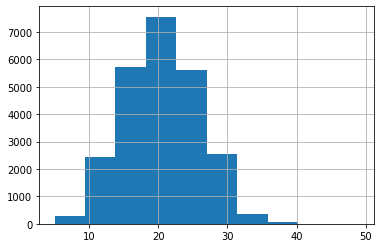

count    24552.000000
mean        20.240225
std          5.321382
min          5.000000
25%         17.000000
50%         21.000000
75%         25.000000
max         49.000000
dtype: float64

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
polb_reviews_len = [len(x) for x in polb_reviews_int]
pd.Series(polb_reviews_len).hist()
plt.show()
pd.Series(polb_reviews_len).describe()

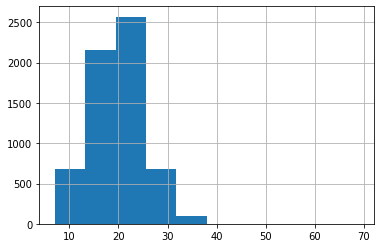

count    6184.000000
mean       20.301746
std         5.402974
min         7.000000
25%        17.000000
50%        21.000000
75%        25.000000
max        69.000000
dtype: float64

In [88]:
%matplotlib inline
polb_test_reviews_len = [len(x) for x in polb_test_reviews_int]
pd.Series(polb_test_reviews_len).hist()
plt.show()
pd.Series(polb_test_reviews_len).describe()

In [0]:
polb_reviews_int = [ polb_reviews_int[i] for i, l in enumerate(polb_reviews_len) if l>0 ]
polb_encoded_labels = [ polb_encoded_labels[i] for i, l in enumerate(polb_reviews_len) if l> 0 ]

In [0]:
polb_test_reviews_int = [ polb_test_reviews_int[i] for i, l in enumerate(polb_test_reviews_len) if l>0 ]
polb_test_encoded_labels = [ polb_test_encoded_labels[i] for i, l in enumerate(polb_test_reviews_len) if l> 0 ]

In [0]:
def pad_features(reviews_int, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's or truncated to the input seq_length.
    '''
    features = np.zeros((len(reviews_int), seq_length), dtype = int)
    
    for i, review in enumerate(reviews_int):
        review_len = len(review)
        
        if review_len <= seq_length:
            zeroes = list(np.zeros(seq_length-review_len))
            new = zeroes+review
        elif review_len > seq_length:
            new = review[0:seq_length]
        
        features[i,:] = np.array(new)
    
    return features

In [92]:
polb_features = pad_features(polb_reviews_int, 200)
print (polb_features[:10,:])
print (len(polb_reviews_int))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
24552


In [93]:
polb_test_features = pad_features(polb_test_reviews_int, 200)
print (polb_test_features[:10,:])
print (len(polb_test_reviews_int))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
6184


In [94]:
import torch
from torch.utils.data import DataLoader, TensorDataset
split_frac = 0.8
len_feat = len(polb_reviews_int)
polb_train_x = torch.from_numpy(np.asarray(polb_features[0:int(split_frac*len_feat)]))
print (polb_train_x)
polb_train_y = torch.from_numpy(np.asarray(polb_encoded_labels[0:int(split_frac*len_feat)]))
print (polb_train_y)
print (type(polb_train_y[:1]))
polb_valid_x = torch.from_numpy(np.asarray(polb_features[int(split_frac*len_feat):]))
print (polb_valid_x)
polb_valid_y = torch.from_numpy(np.asarray(polb_encoded_labels[int(split_frac*len_feat):]))
print (polb_valid_y)

tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])
tensor([1, 0, 0,  ..., 0, 0, 0])
<class 'torch.Tensor'>
tensor([[    0,     0,     0,  ...,     0,     0,     0],
        [    0,     0,     0,  ...,     0,     0,     0],
        [    0,     0,     0,  ...,     0,     0,     0],
        ...,
        [    0,     0,     0,  ...,     0,     0,     0],
        [    0,     0,     0,  ...,     0,     0,     0],
        [    0,     0,     0,  ...,   205,     0, 12488]])
tensor([0, 0, 1,  ..., 1, 0, 0])


In [95]:
split_frac1 = 1
len_feat1 = len(polb_test_reviews_int)
polb_test_x = torch.from_numpy(np.asarray(polb_test_features[0:int(split_frac1*len_feat1)]))
print (polb_test_x)
polb_test_y = torch.from_numpy(np.asarray(polb_test_encoded_labels[0:int(split_frac1*len_feat1)]))
print (polb_test_y)

tensor([[   0,    0,    0,  ...,    0,    0,    0],
        [   0,    0,    0,  ...,    0,    0,    0],
        [   0,    0,    0,  ...,    0,    0,    0],
        ...,
        [   0,    0,    0,  ...,    0,    0,    0],
        [   0,    0,    0,  ...,    0,    0,    0],
        [   0,    0,    0,  ...,  258,    0, 5741]])
tensor([0, 0, 0,  ..., 0, 0, 0])


In [96]:
# create Tensor datasets
polb_train_data = TensorDataset(polb_train_x, polb_train_y)
polb_valid_data = TensorDataset(polb_valid_x, polb_valid_y)
polb_test_data = TensorDataset(polb_test_x, polb_test_y)
# dataloaders
batch_size = 50
# make sure to SHUFFLE your data
polb_train_loader = DataLoader(polb_train_data, shuffle=True, batch_size=batch_size, drop_last=True)
print (polb_train_loader)
polb_valid_loader = DataLoader(polb_valid_data, shuffle=True, batch_size=batch_size, drop_last=True)
print (polb_valid_loader)
polb_test_loader = DataLoader(polb_test_data, shuffle=True, batch_size=batch_size, drop_last=True)
print (polb_test_loader)

In [97]:
# obtain one batch of training data
polb_dataiter = iter(polb_train_loader)
sample_x, sample_y = polb_dataiter.next()
print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print()
print('Sample label size: ', sample_y.size()) # batch_size
print('Sample label: \n', sample_y)

Sample input size:  torch.Size([50, 200])
Sample input: 
 tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]])

Sample label size:  torch.Size([50])
Sample label: 
 tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        1, 0])


In [98]:
# First checking if GPU is available
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [0]:
import torch.nn as nn

class sarcasticLSTM(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(sarcasticLSTM, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sig = nn.Sigmoid()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
    
        # stack up lstm outputs
        lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim)
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sig_out = self.sig(out)
        
        # reshape to be batch_size first
        sig_out = sig_out.view(batch_size, -1)
        sig_out = sig_out[:, -1] # get last batch of labels
        
        # return last sigmoid output and hidden state
        return sig_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
          hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

In [100]:
# Instantiate the model w/ hyperparams
vocab_size = len(polb_vocab_to_int)+1 # +1 for the 0 padding
output_size = 1
embedding_dim = 400
hidden_dim = 512
n_layers = 10
net = sarcasticLSTM(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)
print(net)

sarcasticLSTM(
  (embedding): Embedding(12494, 400)
  (lstm): LSTM(400, 512, num_layers=10, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=512, out_features=1, bias=True)
  (sig): Sigmoid()
)


In [0]:
lr=0.1
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(net.parameters(), lr=lr)

In [102]:
# training params

epochs = 4 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
  net.cuda()

net.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = net.init_hidden(batch_size)

    # batch loop
    for inputs, labels in polb_train_loader:
        counter += 1

        if(train_on_gpu):
          inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise
        # we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        net.zero_grad()

        # get the output from the model
        output, h = net(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.float())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(net.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = net.init_hidden(batch_size)
            val_losses = []
            net.eval()
            for inputs, labels in polb_valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                  inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = net(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.float())

                val_losses.append(val_loss.item())

            net.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))

Epoch: 1/4... Step: 100... Loss: 0.785026... Val Loss: 0.819765
Epoch: 1/4... Step: 200... Loss: 0.493170... Val Loss: 0.377268
Epoch: 1/4... Step: 300... Loss: 0.793789... Val Loss: 0.366258
Epoch: 2/4... Step: 400... Loss: 0.853602... Val Loss: 0.567718
Epoch: 2/4... Step: 500... Loss: 0.644972... Val Loss: 2.135980
Epoch: 2/4... Step: 600... Loss: 1.215819... Val Loss: 0.370113
Epoch: 2/4... Step: 700... Loss: 0.700969... Val Loss: 0.611435
Epoch: 3/4... Step: 800... Loss: 0.745971... Val Loss: 0.502419
Epoch: 3/4... Step: 900... Loss: 0.607820... Val Loss: 0.407401
Epoch: 3/4... Step: 1000... Loss: 0.977317... Val Loss: 0.527895
Epoch: 3/4... Step: 1100... Loss: 0.521214... Val Loss: 0.366541
Epoch: 4/4... Step: 1200... Loss: 1.345610... Val Loss: 0.667485
Epoch: 4/4... Step: 1300... Loss: 0.554225... Val Loss: 0.417487
Epoch: 4/4... Step: 1400... Loss: 0.624238... Val Loss: 0.366987
Epoch: 4/4... Step: 1500... Loss: 2.429779... Val Loss: 0.713026


In [103]:
# Get test data loss and accuracy

test_losses = [] # track loss
num_correct = 0

# init hidden state
h = net.init_hidden(batch_size)

net.eval()
# iterate over test data
for inputs, labels in polb_test_loader:

    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    h = tuple([each.data for each in h])

    if(train_on_gpu):
        inputs, labels = inputs.cuda(), labels.cuda()
    
    # get predicted outputs
    output, h = net(inputs, h)
    
    # calculate loss
    test_loss = criterion(output.squeeze(), labels.float())
    test_losses.append(test_loss.item())
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze())  # rounds to the nearest integer
    
    # compare predictions to true label
    correct_tensor = pred.eq(labels.float().view_as(pred))
    correct = np.squeeze(correct_tensor.numpy()) if not train_on_gpu else np.squeeze(correct_tensor.cpu().numpy())
    num_correct += np.sum(correct)


# -- stats! -- ##
# avg test loss
print("Test loss: {:.3f}".format(np.mean(test_losses)))

# accuracy over all test data
test_acc = num_correct/len(polb_test_loader.dataset)
print("Test accuracy: {:.3f}".format(test_acc))

Test loss: 1.707
Test accuracy: 0.173
